<a href="https://colab.research.google.com/github/gymir-kovalenko/Comparative-Study-of-Thermal-and-Membrane-Based-Solar-Desalination-Techniques/blob/main/final_btp_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required packages if not available
!pip install openpyxl scikit-learn matplotlib seaborn --quiet

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# Step 1: Load dataset
df = pd.read_csv('/content/drive/MyDrive/new desalination_system_data.csv')



In [3]:
df

,solar_irradiance,battery_charge,energy_use,feedwater_salinity,pressure,freshwater_output,system_efficiency,status
0,0.000000,0.000000,90.058421,3871.544125,26.438314,-189.334407,100.000000,0.0
1,165.544816,92.628841,-169.764703,4669.366357,117.626417,328.249978,100.000000,1.0
2,408.136125,100.000000,409.777298,3401.164900,268.938777,203.519385,100.000000,0.0
3,441.034983,100.000000,270.613934,3930.513263,213.653166,78.391477,100.000000,0.0
4,39.195101,100.000000,351.971997,3332.791603,571.546346,387.809158,100.000000,0.0
...,...,...,...,...,...,...,...,...
9995,326.891089,100.000000,225.386268,5375.074883,13.920344,276.118205,95.752834,1.0
9996,437.756432,100.000000,45.444494,3248.452982,185.153278,80.040000,100.000000,0.0
9997,0.000000,100.000000,-132.178255,3754.771204,261.981158,355.165913,100.000000,0.0
9998,37.697817,100.000000,99.043749,6032.739121,646.516620,628.269514,100.000000,1.0


In [4]:
X = df.drop('status', axis=1)

y = df['status']


In [5]:
X.shape

(10000, 7)

In [6]:
y.shape

(10000,)

In [7]:
X

,solar_irradiance,battery_charge,energy_use,feedwater_salinity,pressure,freshwater_output,system_efficiency
0,0.000000,0.000000,90.058421,3871.544125,26.438314,-189.334407,100.000000
1,165.544816,92.628841,-169.764703,4669.366357,117.626417,328.249978,100.000000
2,408.136125,100.000000,409.777298,3401.164900,268.938777,203.519385,100.000000
3,441.034983,100.000000,270.613934,3930.513263,213.653166,78.391477,100.000000
4,39.195101,100.000000,351.971997,3332.791603,571.546346,387.809158,100.000000
...,...,...,...,...,...,...,...
9995,326.891089,100.000000,225.386268,5375.074883,13.920344,276.118205,95.752834
9996,437.756432,100.000000,45.444494,3248.452982,185.153278,80.040000,100.000000
9997,0.000000,100.000000,-132.178255,3754.771204,261.981158,355.165913,100.000000
9998,37.697817,100.000000,99.043749,6032.739121,646.516620,628.269514,100.000000


In [8]:
# Step 3: Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split (2/3 training, 1/3 testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,solar_irradiance,battery_charge,energy_use,feedwater_salinity,pressure,freshwater_output,system_efficiency
9254,389.646190,94.579357,446.073544,3692.622970,229.726884,295.657626,100.0
1561,278.329268,100.000000,88.379850,3740.501931,92.384568,187.360916,100.0
1670,302.789724,100.000000,256.106491,3628.776065,426.618272,231.835394,100.0
6087,608.169495,100.000000,-136.634240,3957.412970,489.828790,44.609865,100.0
6669,191.028469,100.000000,137.997851,4889.025572,241.023918,76.629557,100.0
...,...,...,...,...,...,...,...
5734,134.465982,59.633237,443.860628,3847.741495,402.113841,-32.070172,100.0
5191,77.340828,100.000000,176.294424,3524.792980,14.829810,246.255843,100.0
5390,285.184950,100.000000,199.728436,3782.453370,166.526293,605.599944,100.0
860,0.000000,100.000000,-96.559638,3506.624556,534.294844,104.259265,100.0


In [10]:
y_train

,status
9254,0.0
1561,0.0
1670,0.0
6087,0.0
6669,1.0
...,...
5734,0.0
5191,0.0
5390,0.0
860,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


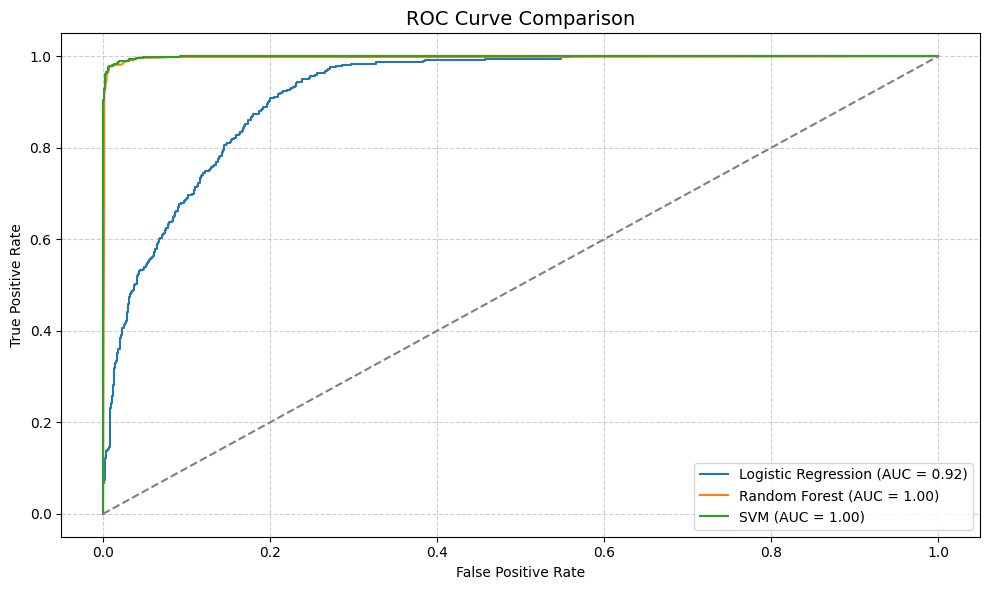

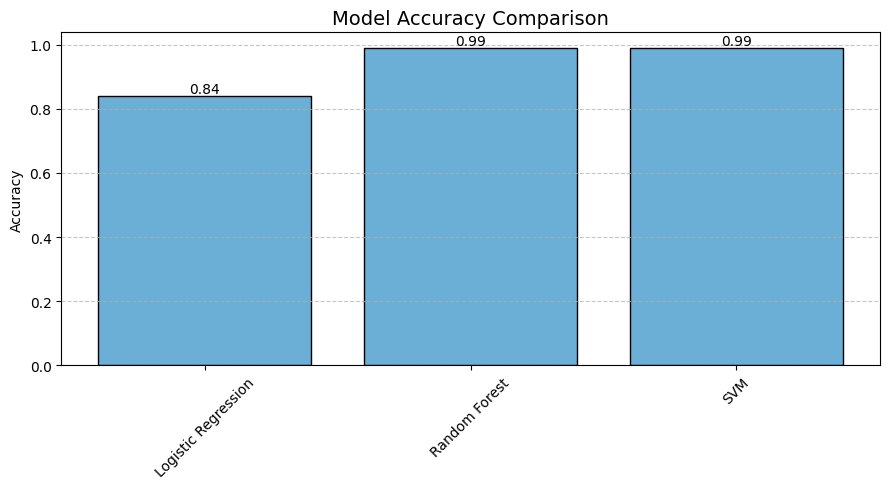

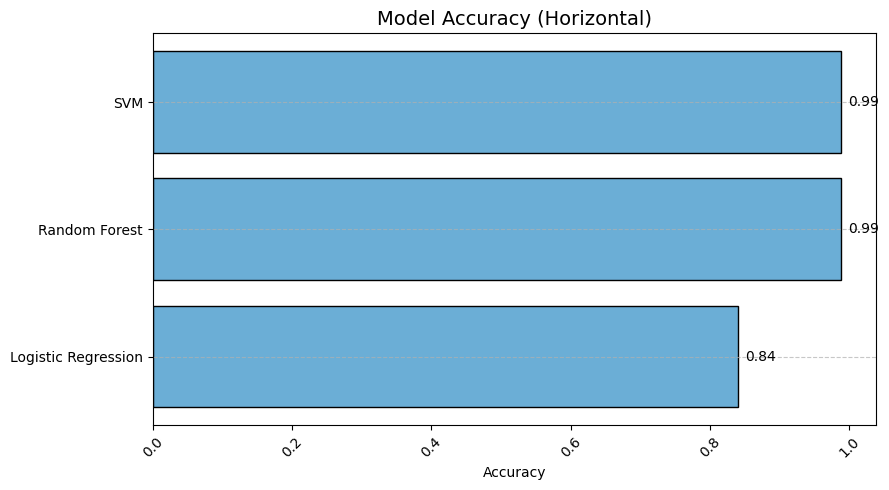

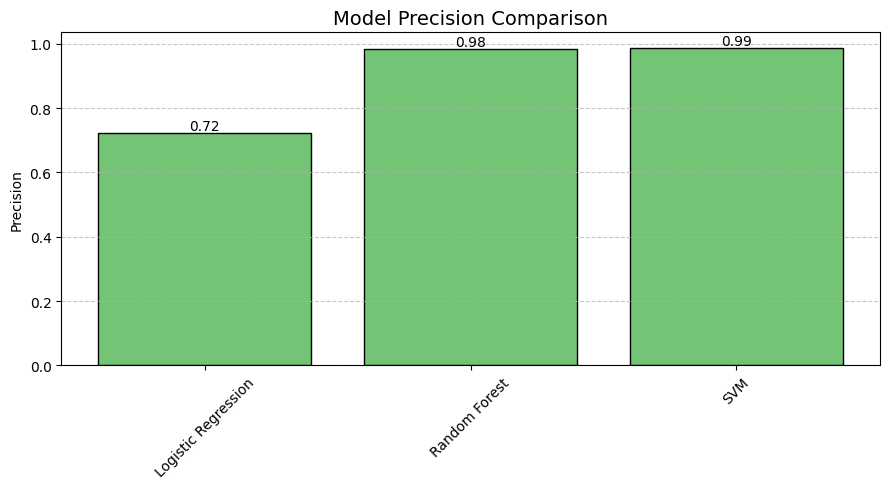

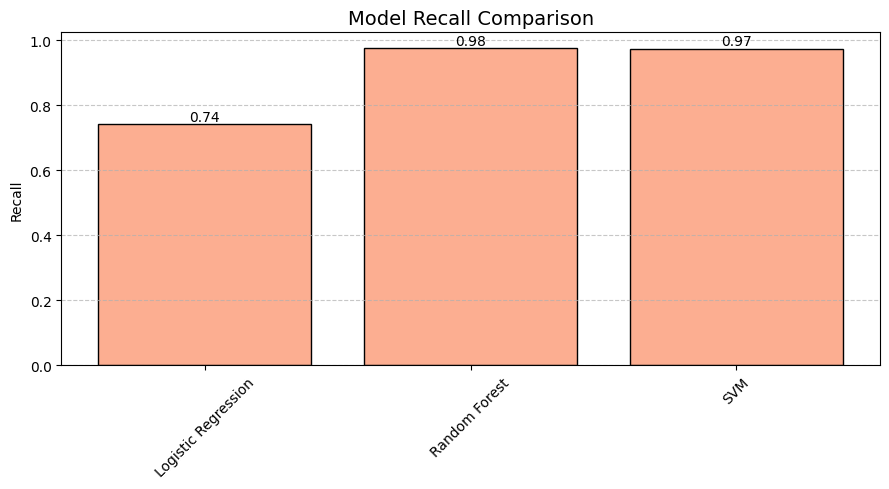

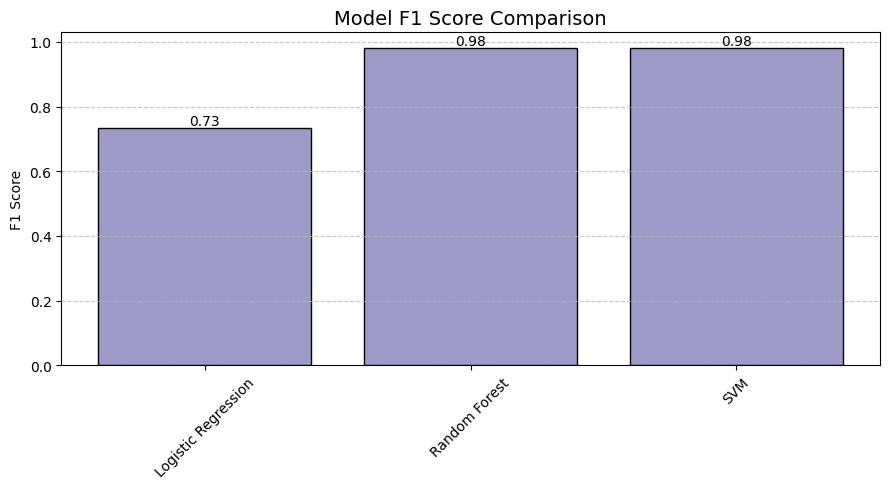

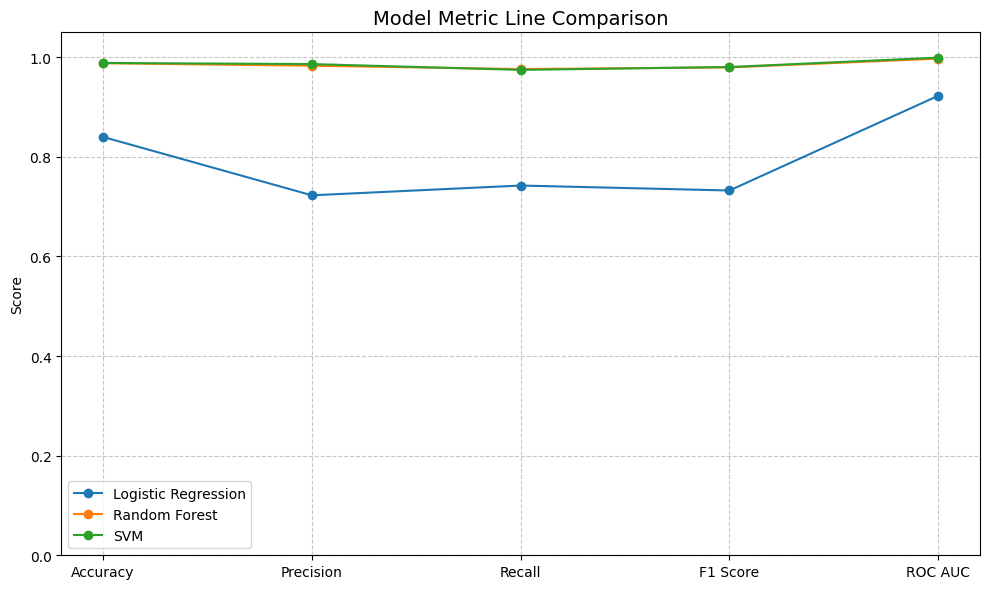

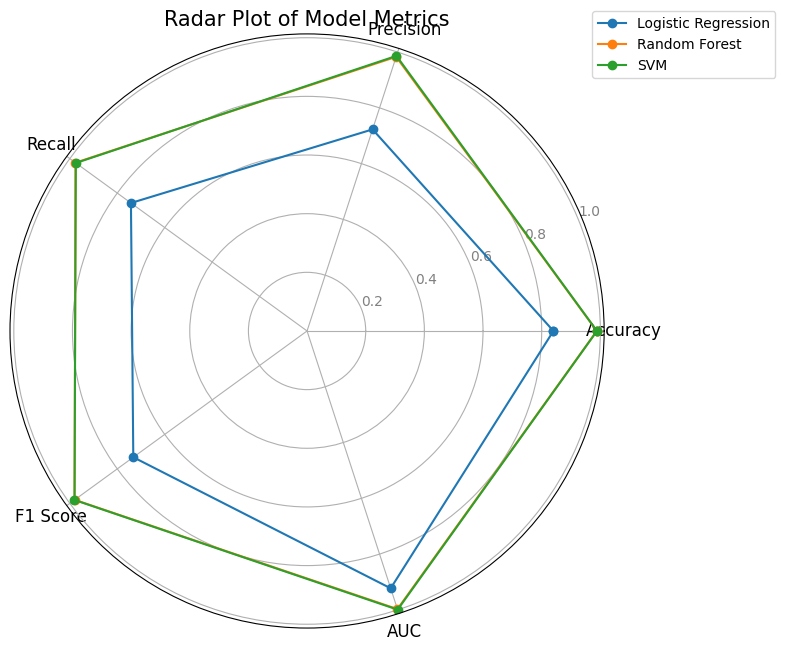

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score,recall_score,f1_score
from math import pi

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Store metrics
accuracies = {}
precisions = {}
recalls = {}
f1s = {}
aucs = {}
probas = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracies[name] = accuracy_score(y_test, y_pred)
    precisions[name] = precision_score(y_test, y_pred)
    recalls[name] = recall_score(y_test, y_pred)
    f1s[name] = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    aucs[name] = auc(fpr, tpr)
    probas[name] = (fpr, tpr, _)

# ========== Function to plot bar chart ========== #
def plot_bar_with_labels(metric_dict, title, ylabel, color='skyblue', horizontal=False):
    plt.figure(figsize=(9, 5))
    keys = list(metric_dict.keys())
    values = list(metric_dict.values())

    if horizontal:
        bars = plt.barh(keys, values, color=color, edgecolor='black')
        for bar in bars:
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                     f"{bar.get_width():.2f}", va='center', fontsize=10)
        plt.xlabel(ylabel)
    else:
        bars = plt.bar(keys, values, color=color, edgecolor='black')
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f"{bar.get_height():.2f}", ha='center', fontsize=10)
        plt.ylabel(ylabel)

    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ========== 1. Plot ROC Curve ========== #
plt.figure(figsize=(10, 6))
for name in models:
    fpr, tpr, _ = probas[name]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {aucs[name]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ========== 2. Accuracy Bar Charts ========== #
plot_bar_with_labels(accuracies, "Model Accuracy Comparison", "Accuracy", "#6BAED6")
plot_bar_with_labels(accuracies, "Model Accuracy (Horizontal)", "Accuracy", "#6BAED6", horizontal=True)

# ========== 3. Other Metric Charts ========== #
plot_bar_with_labels(precisions, "Model Precision Comparison", "Precision", "#74C476")
plot_bar_with_labels(recalls, "Model Recall Comparison", "Recall", "#FCAE91")
plot_bar_with_labels(f1s, "Model F1 Score Comparison", "F1 Score", "#9E9AC8")

# ========== 4. Line Plot ========== #
plt.figure(figsize=(10, 6))
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for name in models:
    values = [
        accuracies[name],
        precisions[name],
        recalls[name],
        f1s[name],
        aucs[name]
    ]
    plt.plot(metrics_names, values, marker='o', label=name)
plt.title("Model Metric Line Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ========== 5. Radar Plot (Spider Chart) ========== #
df_metrics = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1s,
    'AUC': aucs
})

categories = list(df_metrics.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for name in df_metrics.index:
    values = df_metrics.loc[name].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', label=name)

plt.xticks(angles[:-1], categories, color='black', size=12)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
plt.title("Radar Plot of Model Metrics", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.show()

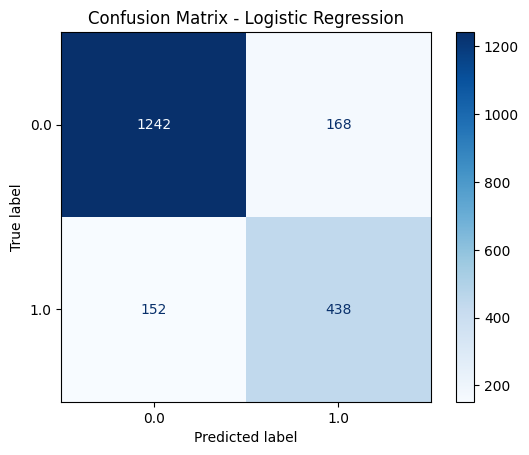

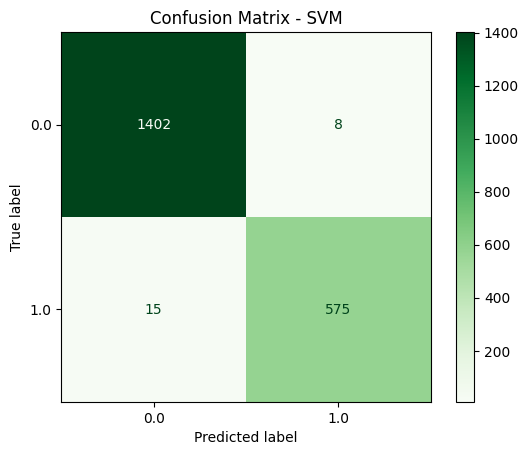

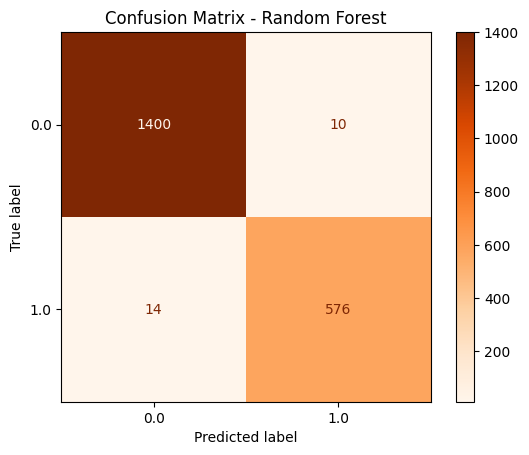

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix for Logistic Regression
y_pred_logreg = models['Logistic Regression'].predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=models['Logistic Regression'].classes_)
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

# Plot confusion matrix for SVM
y_pred_svm = models['SVM'].predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=models['SVM'].classes_)
disp_svm.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - SVM")
plt.grid(False)
plt.show()

# Plot confusion matrix for Random Forest
y_pred_rf = models['Random Forest'].predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=models['Random Forest'].classes_)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()


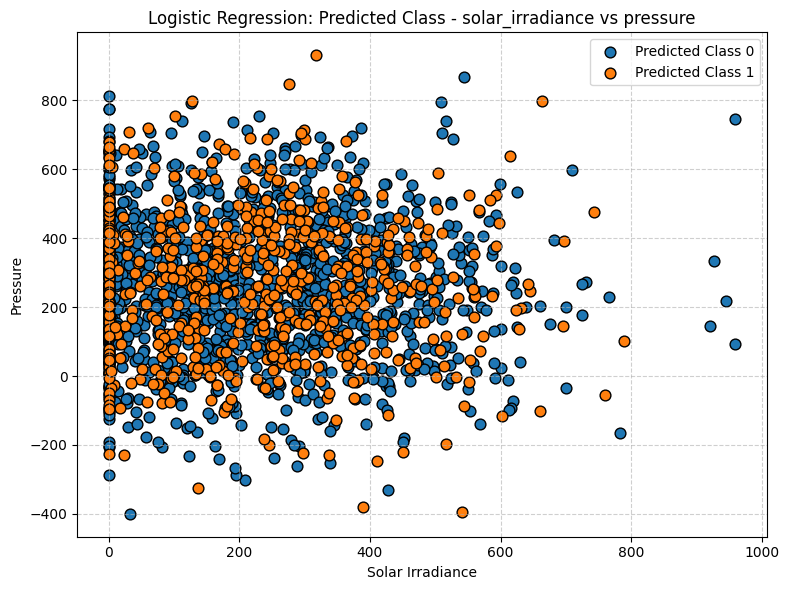

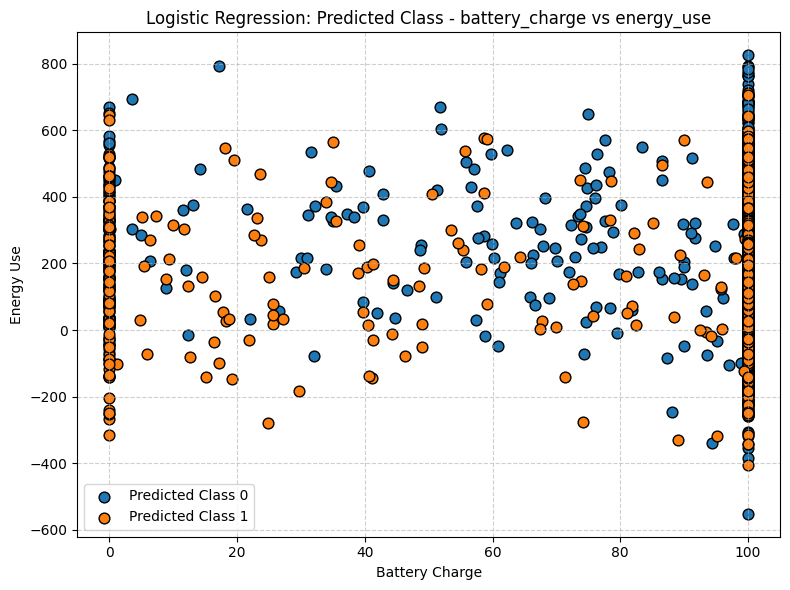

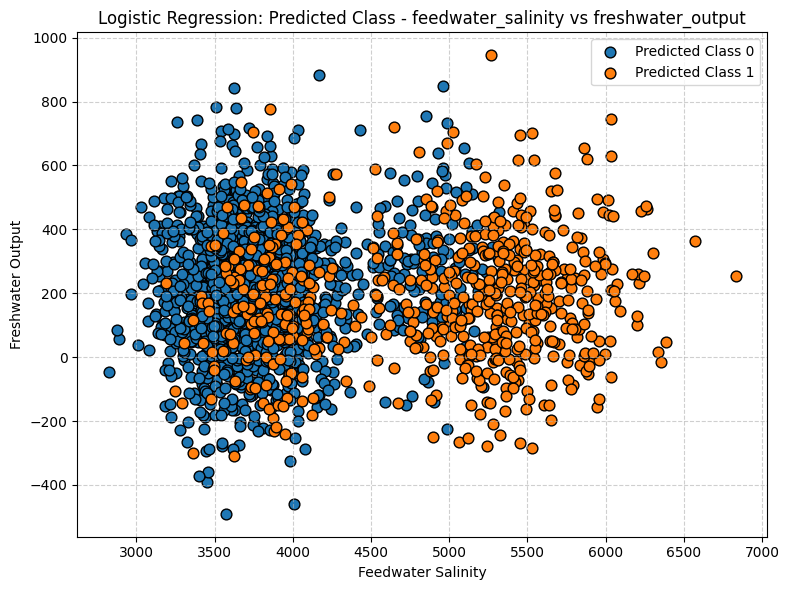

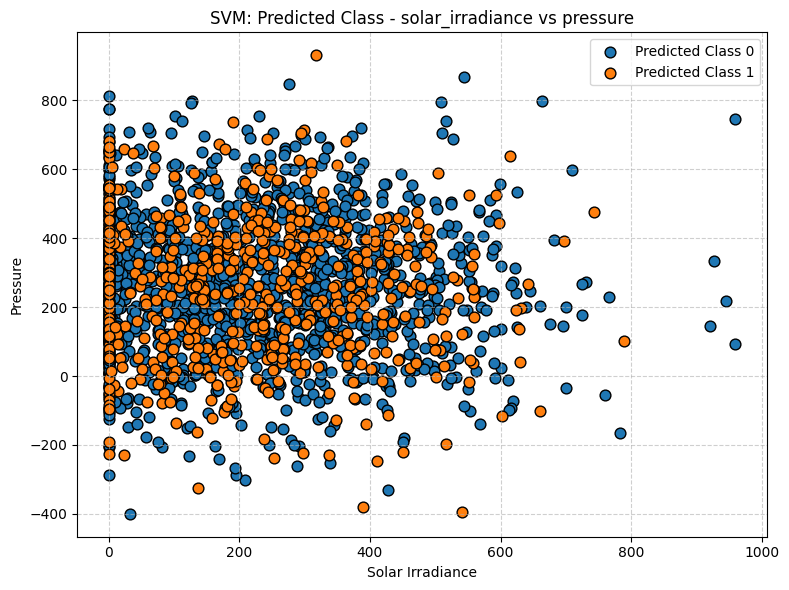

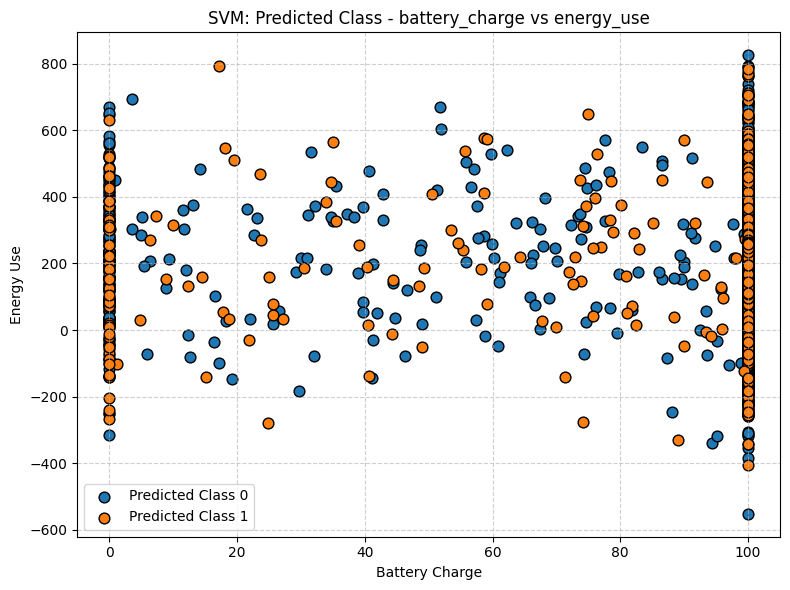

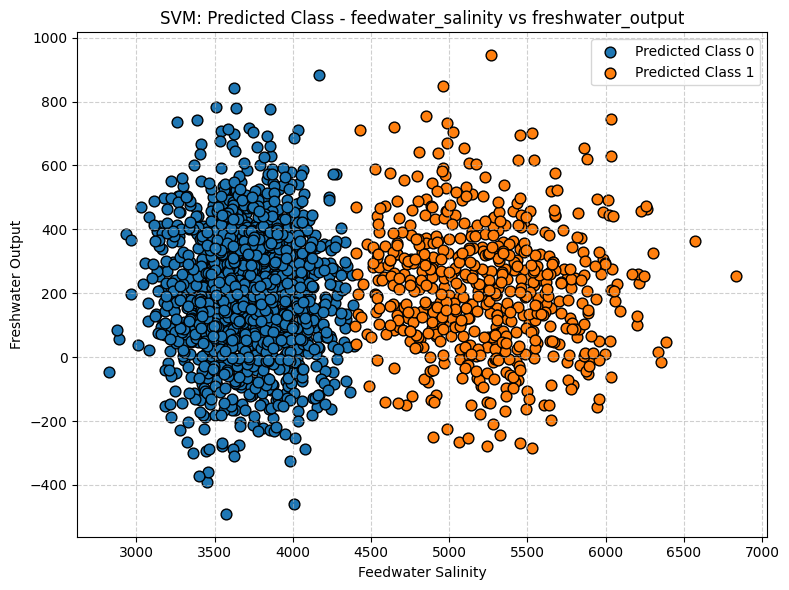

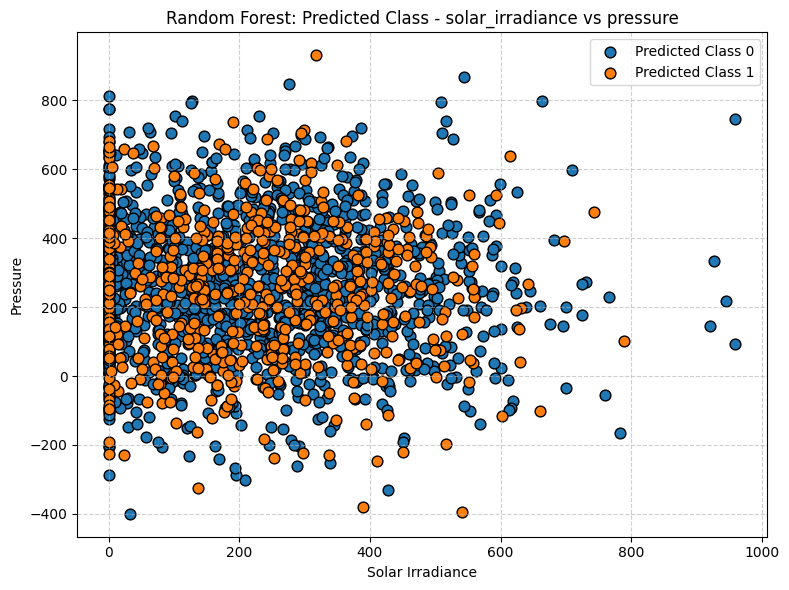

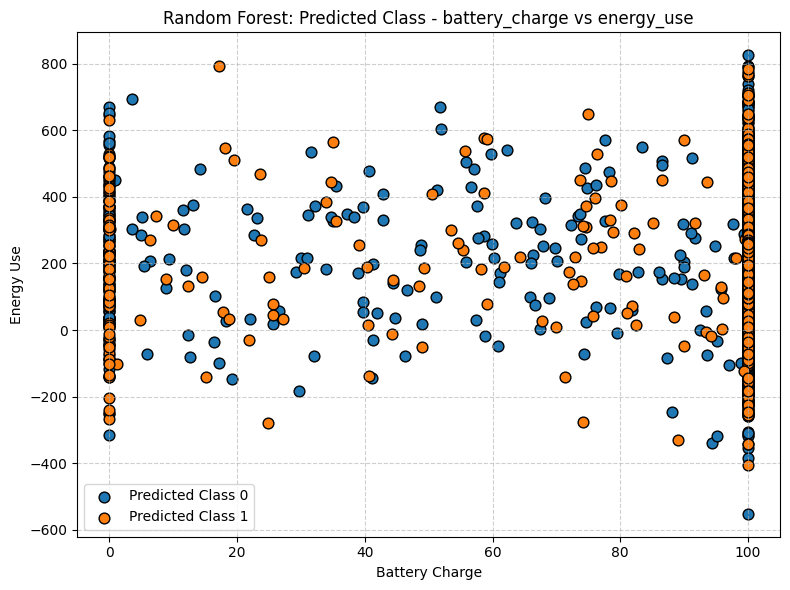

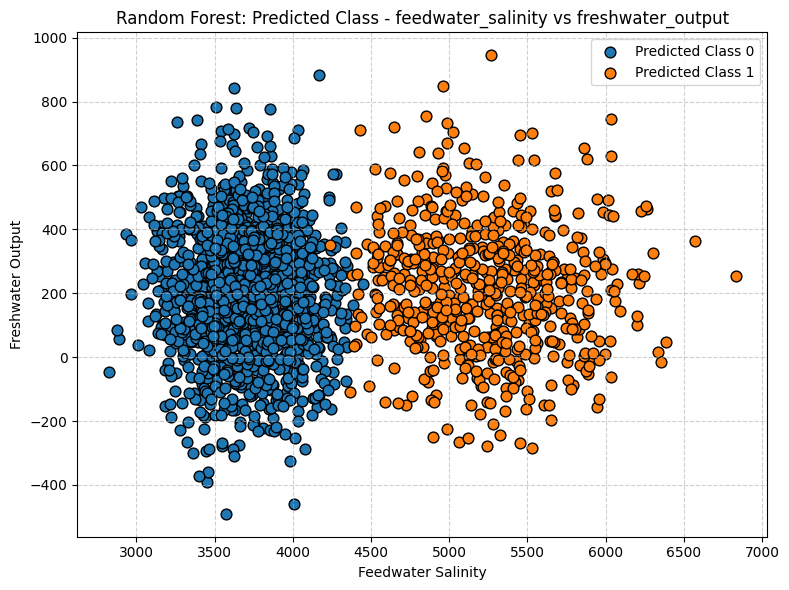

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define feature pairs
feature_pairs = [
    ('solar_irradiance', 'pressure'),
    ('battery_charge', 'energy_use'),
    ('feedwater_salinity', 'freshwater_output')
]

# Define models and colors
model_names = ['Logistic Regression', 'SVM', 'Random Forest']
colors = ['#1f77b4', '#ff7f0e']  # Class 0, Class 1

# Loop over models and feature pairs
for model_name in model_names:
    model = models[model_name]
    y_pred = model.predict(X_test)

    for feature_x, feature_y in feature_pairs:
        X_test_2D = X_test[[feature_x, feature_y]].copy()

        plt.figure(figsize=(8, 6))
        for label in np.unique(y_pred):
            plt.scatter(
                X_test_2D[y_pred == label][feature_x],
                X_test_2D[y_pred == label][feature_y],
                c=colors[int(label)],
                label=f'Predicted Class {int(label)}',
                edgecolor='k',
                s=60
            )

        plt.xlabel(feature_x.replace('_', ' ').title())
        plt.ylabel(feature_y.replace('_', ' ').title())
        plt.title(f"{model_name}: Predicted Class - {feature_x} vs {feature_y}")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      1410
         1.0       0.64      0.88      0.74       590

    accuracy                           0.82      2000
   macro avg       0.79      0.84      0.80      2000
weighted avg       0.85      0.82      0.83      2000


Confusion Matrix:
[[1118  292]
 [  70  520]]

Accuracy: 0.819
ROC AUC: 0.8830352205793964


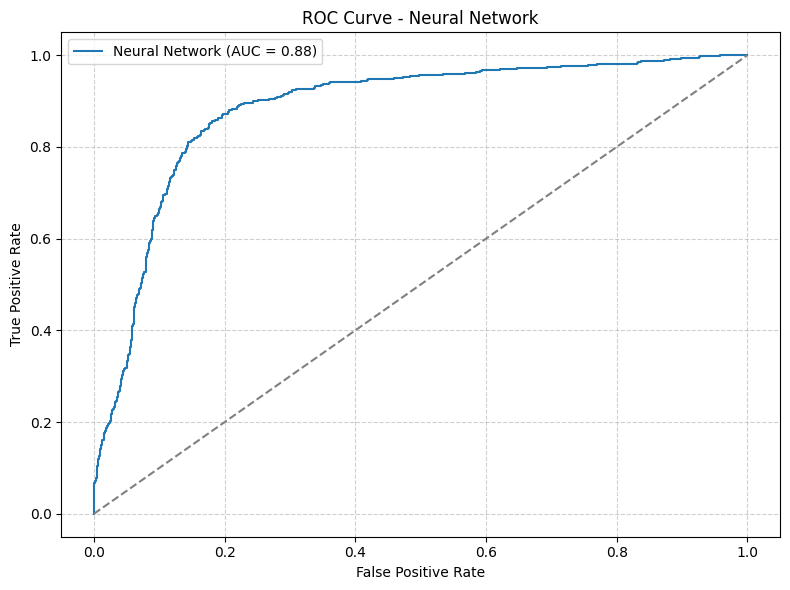

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                    solver='adam', max_iter=500, early_stopping=True, random_state=42)

mlp.fit(X_train, y_train)

# Predictions
y_pred_nn = mlp.predict(X_test)
y_proba_nn = mlp.predict_proba(X_test)[:, 1]

# Evaluate metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nAccuracy:", accuracy_score(y_test, y_pred_nn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nn))

# ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_proba_nn):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


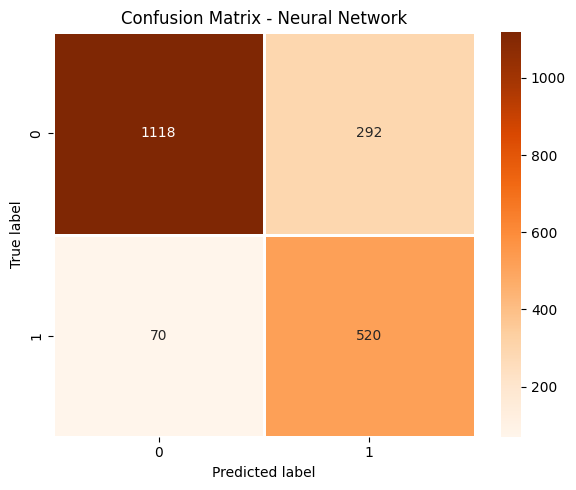

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for the neural network
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot it with styling similar to the provided image
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', cbar=True, linewidths=1, linecolor='white')

plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


<ipython-input-16-5970bc74ac11>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


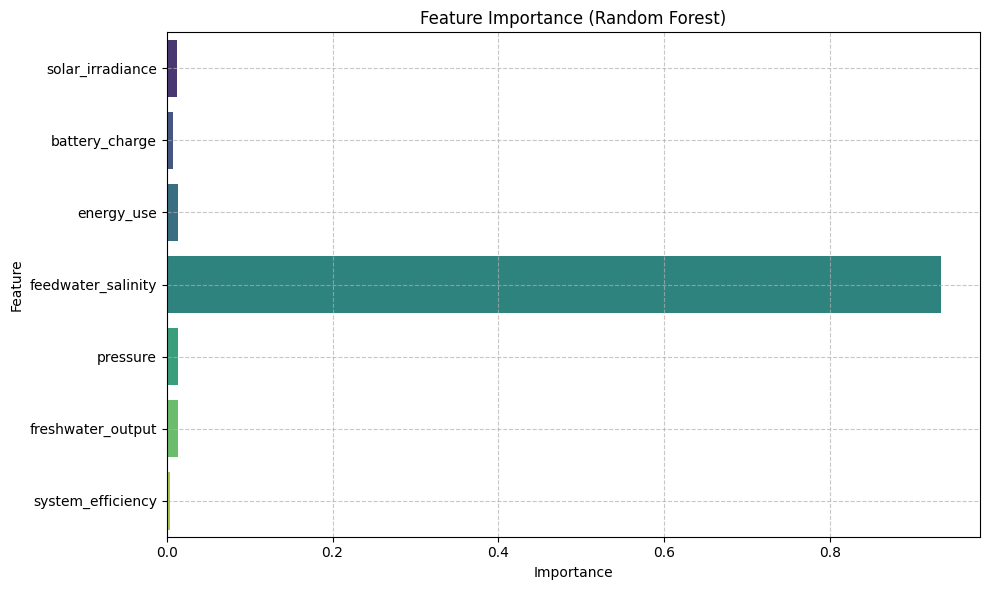

In [16]:
# Feature Importance from Random Forest
# Re-train if not accessible directly
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = X.columns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-17-8210b0521682>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="Blues_d")


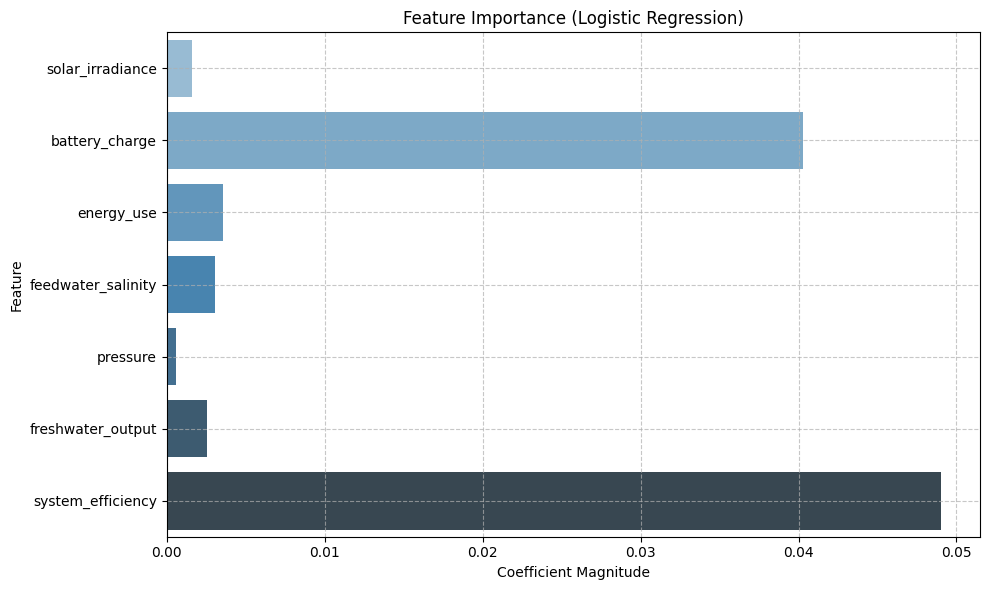

In [17]:
# Re-train Logistic Regression model (if needed)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Get feature importances from absolute value of coefficients
importances = abs(log_model.coef_[0])
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="Blues_d")
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-18-bb3ba195b4e6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="Greens_d")


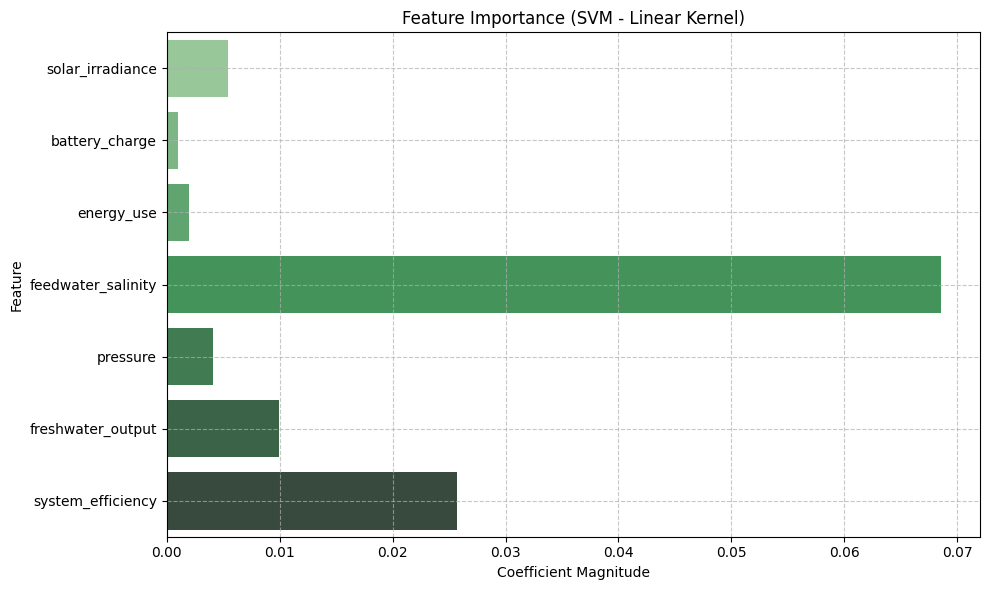

In [18]:
# Re-train SVM model with linear kernel (ensure linear for feature importance)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Get feature importances from absolute value of coefficients
importances = abs(svm_model.coef_[0])
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="Greens_d")
plt.title("Feature Importance (SVM - Linear Kernel)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
